In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full=cv2.imread('../DATA/sammy.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

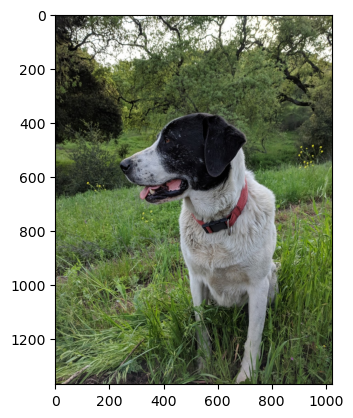

In [3]:
plt.imshow(full)

In [4]:
face=cv2.imread('../DATA/sammy_face.jpg')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

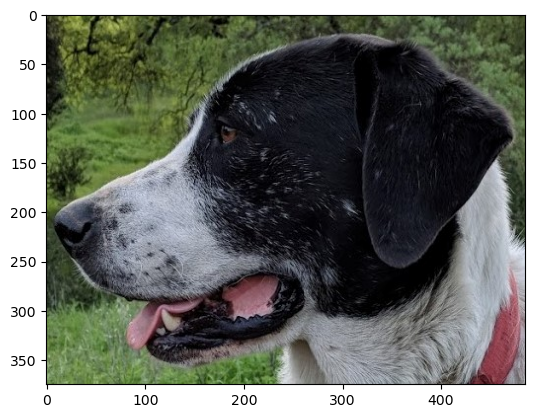

In [5]:
plt.imshow(face)

In [6]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'] 

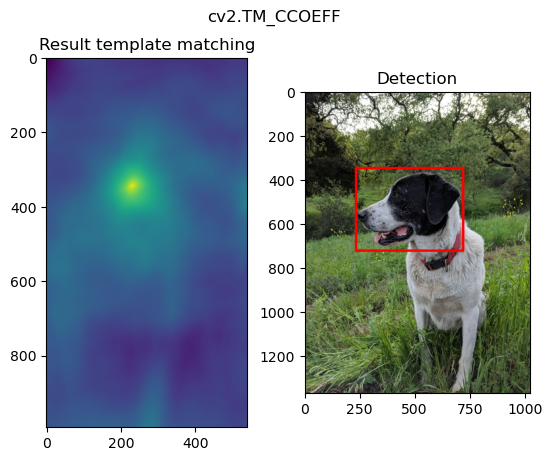

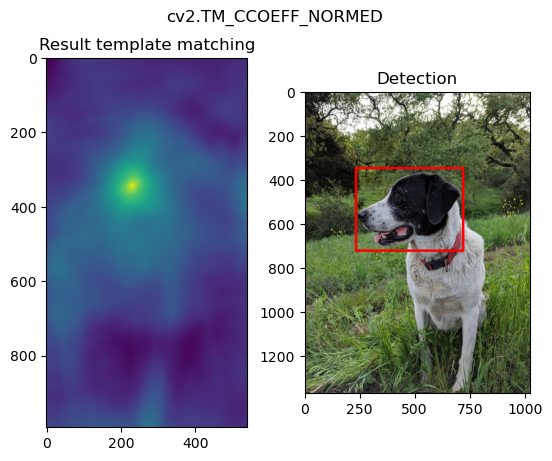

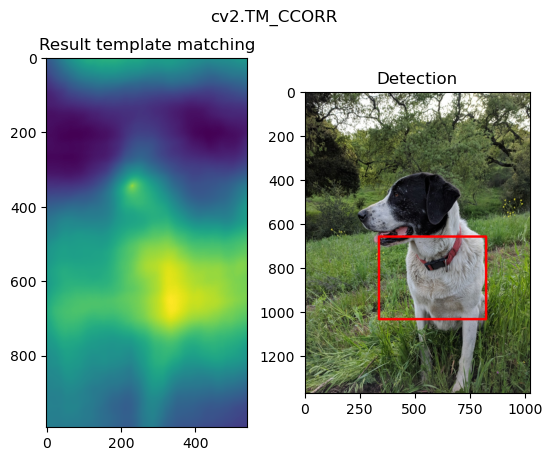

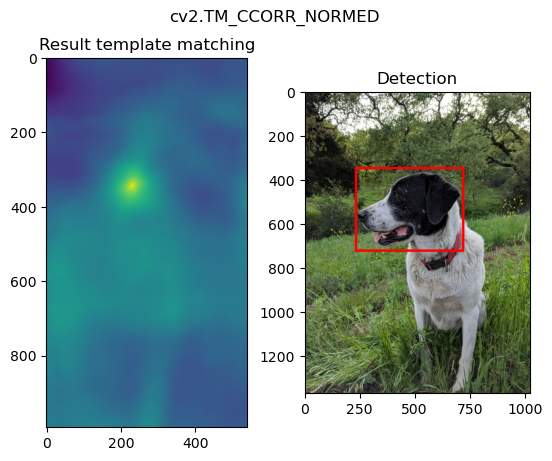

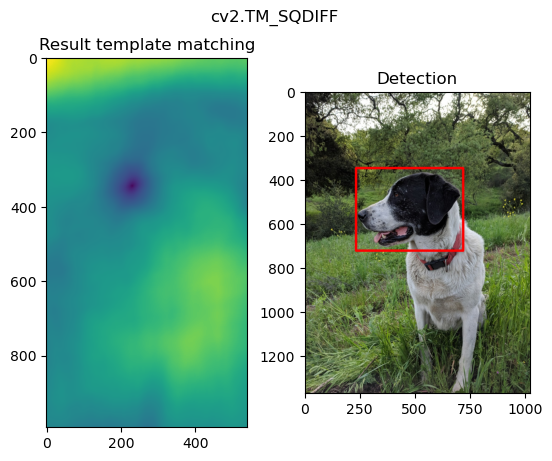

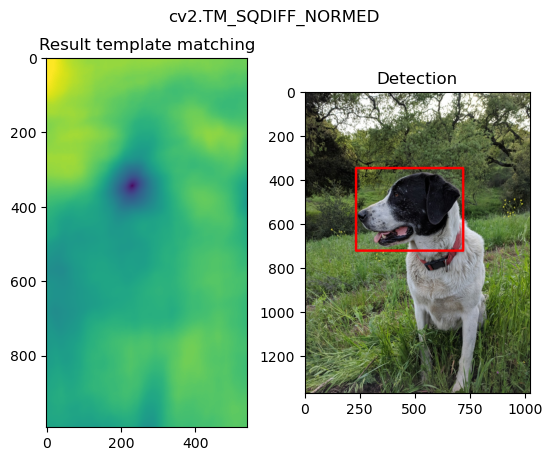

In [12]:
for m in methods:
    #Copy of image
    fullcopy=full.copy()
    method=eval(m)
    #Template Matching
    res=cv2.matchTemplate(fullcopy,face,method)
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
        
    height,width,cc=face.shape
    bot_right=(top_left[0]+width,top_left[1]+height)
    cv2.rectangle(fullcopy,top_left,bot_right,(255,0,0),10)
    #plot and show the image
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result template matching')
    plt.subplot(122)
    plt.imshow(fullcopy)
    plt.title('Detection')
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')
    